<a href="https://colab.research.google.com/github/APaulalvarez/Data-Science-III-NLP-Deep-Learning-aplicado-a-Ciencia-de-Datos/blob/main/Alvarez_Taller_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <U>**Taller Redes Neuronales**</U>
## **Data Science III: NLP & Deep Learning aplicado a Ciencia de Datos - Coderhouse**
### **_Alumna:_** Ana Paula Alvarez Pringles
### **_Comisión:_** 60960
### **_Porfesor:_**  Ignacio Russo Locati
### **_Tutor:_**  Mariano Rodas



# Manipulación de dataset de imágenes y creación de una red neuronal convolucional sencilla

Este set de datos se compone de imágenes de caras de personas usando anteojos como sin ellos, con el objetivo de crear a futuro una red neuronal que permita clasificar imágenes de personas que usen o no anteojos.

Aunque este dataset posee a mi opinión una limitante, que la mayoría de las imágenes de la clase "con anteojos" lleva anteojos negros, entonces la red aprende solo con esa referencia. Aunque probablemente un anteojo de otro color, cuando se modifica la imágen a blanco y negro, también quede como un patron de pixeles mas oscuros al rededor de los ojos.


el valor de entrada es la cantidad de pixeles de cada imagen
valor de salida dos = con o sin anteojos


In [ ]:
# Carga de dependencias

from google.colab import files
import os
import io
import zipfile
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from scipy.signal import convolve2d
from skimage import color
import matplotlib.pyplot as plt

In [ ]:
# Importamos el dataset de imágenes comprimidas

uploded= files.upload()

Saving glasses_1.zip to glasses_1.zip


In [ ]:
# Descomprimimos

data=zipfile.ZipFile(io.BytesIO(uploded['glasses_1.zip']),'r')
data.extractall('data')

In [ ]:
# Creamos los subsets de testeo y entrenamiento.

from keras.utils import image_dataset_from_directory

train = image_dataset_from_directory(
    directory="data/glasses/train",
    labels="inferred",
    label_mode="binary",
    color_mode="rgb",
    batch_size=16,
    image_size=(130, 130),
    shuffle=True,
    seed=42
  )

Found 131 files belonging to 2 classes.


In [ ]:
test = image_dataset_from_directory(
    directory="data/glasses/test",
    labels=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(130, 130),
    shuffle=True,
    seed=42
  )

Found 33 files.


In [ ]:
class_names = train.class_names
print(class_names)

['glasses', 'noglasses']


<ipython-input-38-103aff2a181b>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_name = class_names[int(label)]


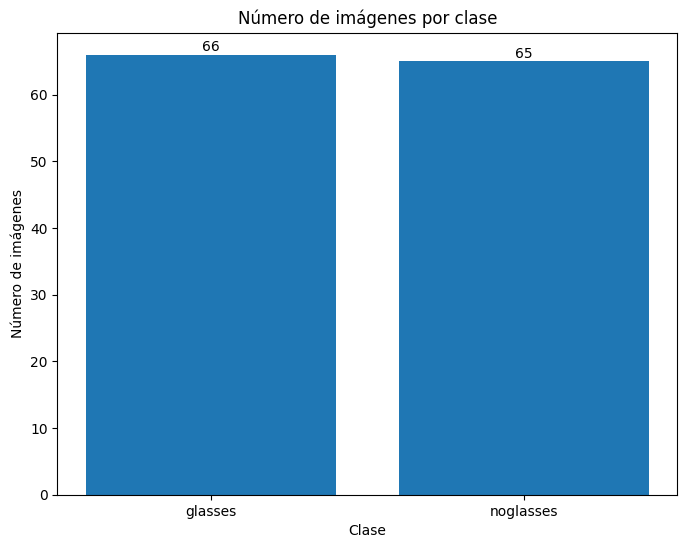

In [ ]:
# Graficamos las clases
class_names = train.class_names
image_counts = {}

for images, labels in train:
    for label in labels.numpy():
        class_name = class_names[int(label)]
        image_counts[class_name] = image_counts.get(class_name, 0) + 1

plt.figure(figsize=(8, 6))
bars=plt.bar(image_counts.keys(), image_counts.values())
plt.title("Número de imágenes por clase")
plt.xlabel("Clase")
plt.ylabel("Número de imágenes")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, yval, ha='center', va='bottom')

plt.show()

<ipython-input-44-3759a583d257>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(labels[i].numpy())])


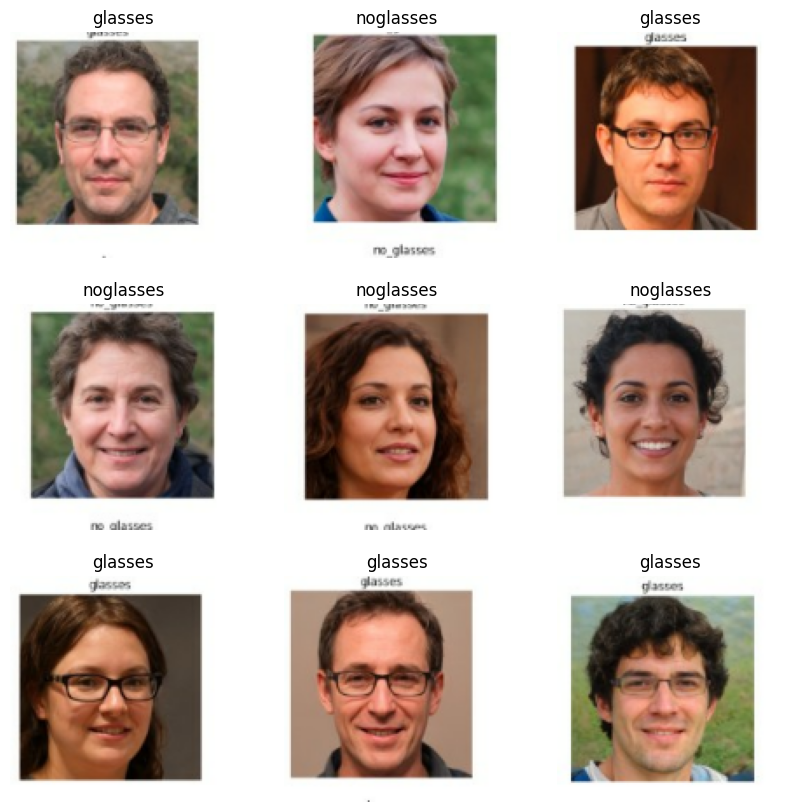

In [ ]:
# Obtener las primeras 9 imágenes y etiquetas del dataset `train`
images, labels = next(iter(train.take(1)))
images = images[:9]
labels = labels[:9]

# Mostrar las imágenes en una cuadrícula de 3x3
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[int(labels[i].numpy())])
    plt.axis("off")
plt.show()

## Insights


*   El dataset contiene 131 imágenes para entrenamiento y 33 imágenes de testeo.

*   Posee dos clases: "con anteojos" y "sin anteojos".

*   Las clases se encuentran balanceadas, con 66 y 65 imágenes respectivamente.

*   Las imágenes se componen de rostros de personas, ubicadas de frente. En cuanto a los fondos, son variados desde lisos a paisajes exteriores con verdes.

*   Podemos encontrar rostros tanto de niños, como de varones y mujeres. Además de abarcar un amplio rango etario.

## Práctica - Primera capa: Convolución

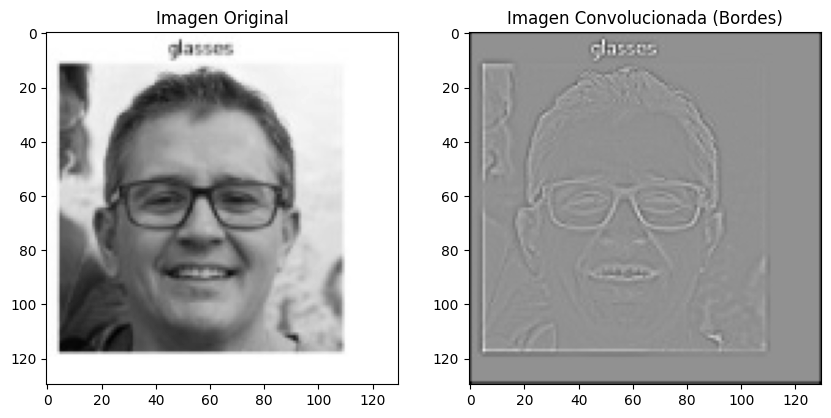

In [ ]:
# Ejemplo con la primera imagenes de train
first_image = images[0].numpy().astype("uint8")

# Convertimos a escala de grises
image = color.rgb2gray(first_image)

# Definir un filtro (kernel) para bordes
kernel = np.array([[-1, -1, -1],
                   [2,  2, 2],
                   [-1, -1, -1]])

# Aplicar convolución
convoluted_image = convolve2d(image, kernel, mode='same')

# Mostrar la imagen original y la imagen convolucionada
plt.figure(figsize=(10, 5))

# Imagen original
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image, cmap='gray')

# Imagen convolucionada
plt.subplot(1, 2, 2)
plt.title('Imagen Convolucionada (Bordes)')
plt.imshow(convoluted_image, cmap='gray')

plt.show()

Podemos observar como se define el anteojo.

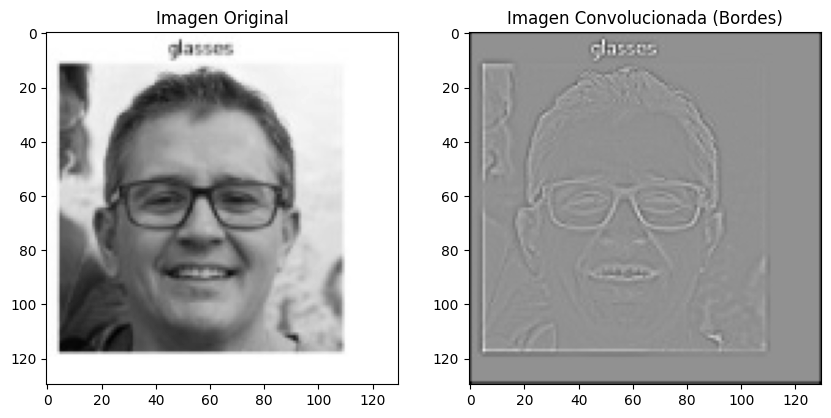

In [ ]:
# Probamos con otro kernel
# Ejemplo con la primera imagenes de train
first_image = images[0].numpy().astype("uint8")

# Convertimos a escala de grises
image = color.rgb2gray(first_image)

# Definir un filtro de detección de esquinas (filtro Laplaciano)
kernel = np.array([[ 0,  1,  0],
                   [ 1, -4,  1],
                   [ 0,  1,  0]])

# Aplicar convolución
convoluted_image = convolve2d(image, kernel, mode='same')

# Mostrar la imagen original y la imagen convolucionada
plt.figure(figsize=(10, 5))

# Imagen original
plt.subplot(1, 2, 1)
plt.title('Imagen Original')
plt.imshow(image, cmap='gray')

# Imagen convolucionada
plt.subplot(1, 2, 2)
plt.title('Imagen Convolucionada (Bordes)')
plt.imshow(convoluted_image, cmap='gray')

plt.show()

## Práctica - Segunda capa: Pooling

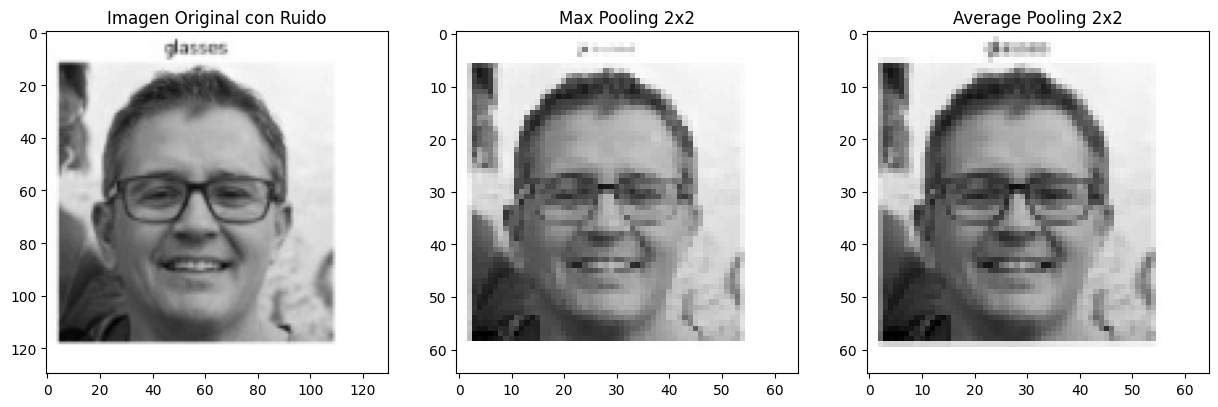

In [ ]:
 # Ejemplo con la primera imagenes de train
first_image = images[0].numpy().astype("uint8")

# Convertimos a escala de grises
image = color.rgb2gray(first_image)

# Definir una función para realizar el max pooling
def max_pooling(image, pool_size):
    pooled_image = image.copy()
    output_shape = (image.shape[0] // pool_size, image.shape[1] // pool_size)
    pooled_image = np.zeros(output_shape)

    for i in range(0, image.shape[0]- pool_size + 1, pool_size):
        for j in range(0, image.shape[1]- pool_size + 1, pool_size):
            pooled_image[i // pool_size, j // pool_size] = np.max(image[i:i + pool_size, j:j + pool_size])

    return pooled_image

# Definir una función para realizar el average pooling
def average_pooling(image, pool_size):
    pooled_image = image.copy()
    output_shape = (image.shape[0] // pool_size, image.shape[1] // pool_size)
    pooled_image = np.zeros(output_shape)

    for i in range(0, image.shape[0]- pool_size + 1, pool_size):
        for j in range(0, image.shape[1]- pool_size + 1, pool_size):
            pooled_image[i // pool_size, j // pool_size] = np.mean(image[i:i + pool_size, j:j + pool_size])

    return pooled_image

# Aplicar max pooling y average pooling con tamaño de bloque 2x2
pool_size = 2
max_pooled_image = max_pooling(image, pool_size)
avg_pooled_image = average_pooling(image, pool_size)

# Mostrar las imágenes originales y con pooling
plt.figure(figsize=(15, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.title('Imagen Original con Ruido')
plt.imshow(image, cmap='gray')

# Max Pooling
plt.subplot(1, 3, 2)
plt.title('Max Pooling 2x2')
plt.imshow(max_pooled_image, cmap='gray')

# Average Pooling
plt.subplot(1, 3, 3)
plt.title('Average Pooling 2x2')
plt.imshow(avg_pooled_image, cmap='gray')

plt.show()


No aplico random noise ya que la calidad de las imágenes ya era baja.
Buen resultado del average pooling con un pool size de 2 o 3, más alto ya se pierde la información del anteojo.

In [ ]:
#Parámetros

num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

## Aplicar Red

In [ ]:
import torch
from torch import nn
import torchvision
from IPython import display
from torchvision import transforms

## Tercera: Fully connected layer

## Cuarta capa: Adiós linealidad!

Aplicamos alguna función de activación.